In [16]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [17]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

# bdd 1

In [18]:
bdd = pd.read_csv("/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/summary/bdd_2023-09-04_no_earlystopping_shuffled.csv", index_col=0)
bdd = bdd.sort_values(by=['best_test_auc'], ascending=False)

In [19]:
len(bdd)

44

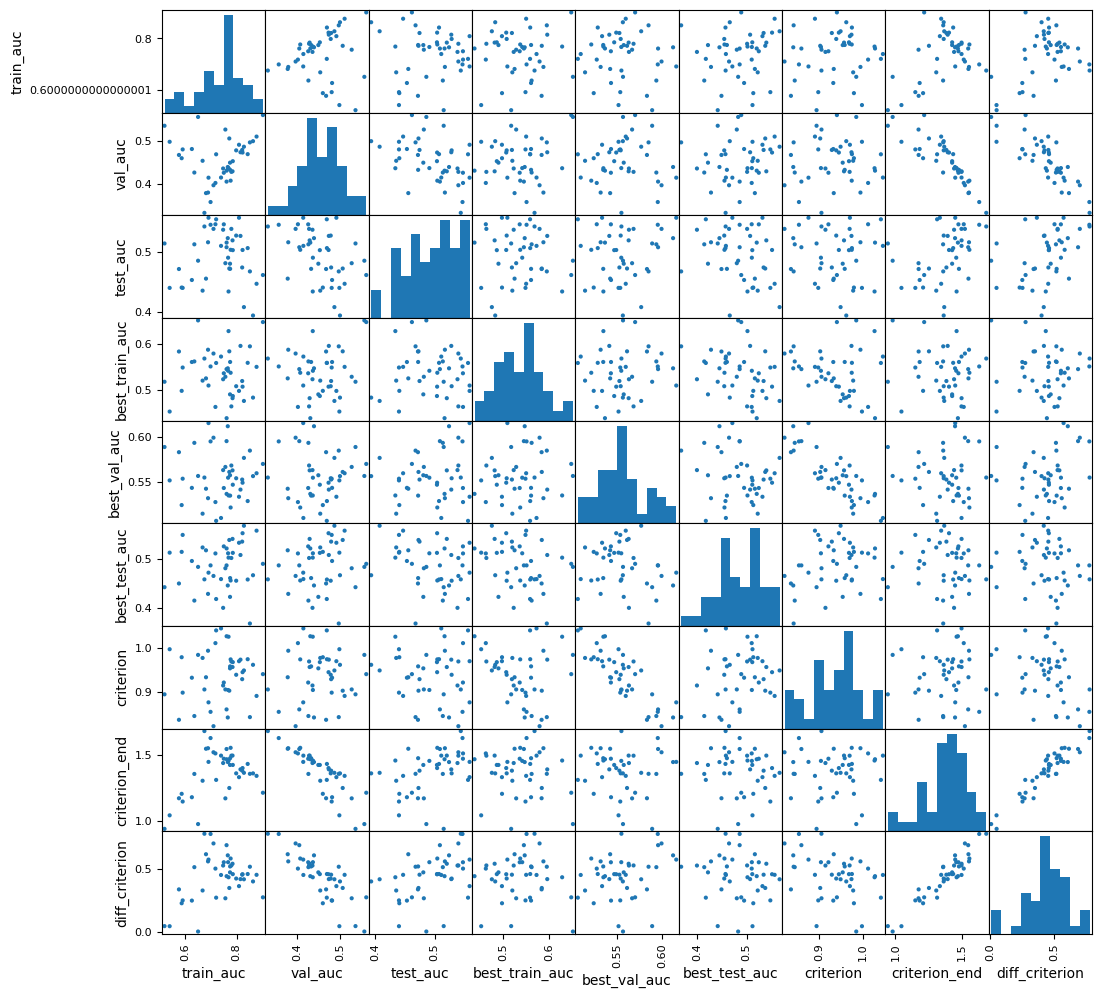

In [20]:
bdd["criterion"] = abs(bdd["best_val_auc"] - bdd["best_train_auc"]) + 2*(1-bdd["best_val_auc"])
bdd["criterion_end"] = abs(bdd["val_auc"] - bdd["train_auc"]) + 2*(1-bdd["val_auc"])
bdd["diff_criterion"] = abs(bdd["criterion"]-bdd["criterion_end"])
bdd["diff_best"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"]))
bdd["diff_end"] = np.log(abs(bdd["val_auc"] - bdd["train_auc"])+0.01)
bdd["criterion2"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"])) + np.log(0.7-bdd["best_val_auc"])
bdd["diff"] = np.log(abs(bdd["best_train_auc"] - 0.55))
obj = pd.plotting.scatter_matrix(bdd[['train_auc', 'val_auc', 'test_auc', 'best_train_auc', 'best_val_auc', 'best_test_auc', 'criterion', 'criterion_end', 'diff_criterion']],
                                 figsize=(12,12),
                                 alpha=1.0)

In [21]:
# bdd[bdd['best_test_auc']>0.6]['model_path'].iat[0]

Text(0, 0.5, 'best_test_auc')

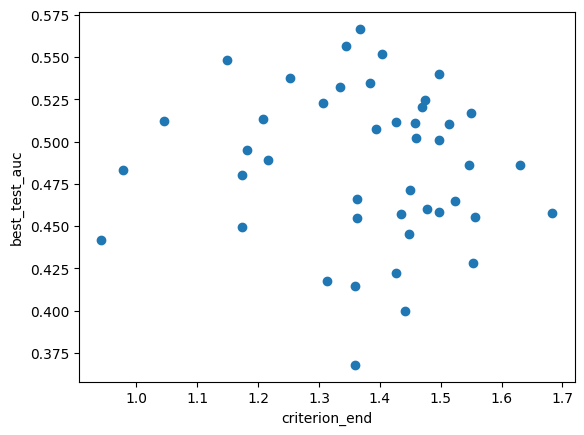

In [22]:
plt.scatter(bdd["criterion_end"], bdd.best_test_auc)
plt.xlabel("criterion_end")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

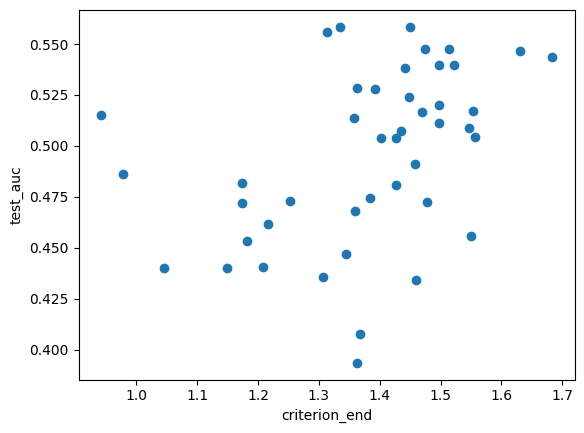

In [23]:
plt.scatter(bdd["criterion_end"], bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

In [24]:
quantile = []
test_auc = []
quantile_x = np.arange(0.05,1,0.05)
for q in quantile_x:
    one_quantile = bdd['criterion_end'].quantile(q=q)
    quantile.append(one_quantile)
    test_auc.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].mean())

Text(0, 0.5, 'test_auc')

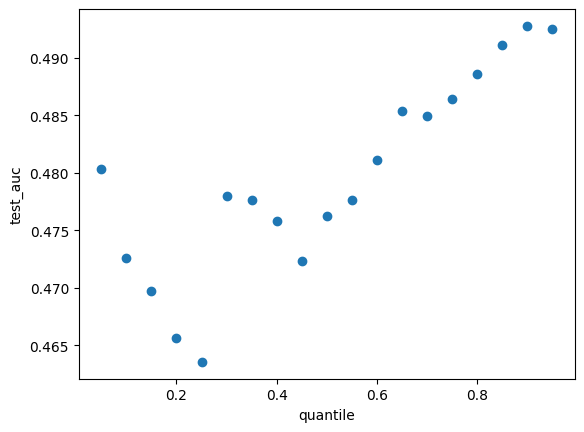

In [25]:
plt.scatter(quantile_x, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

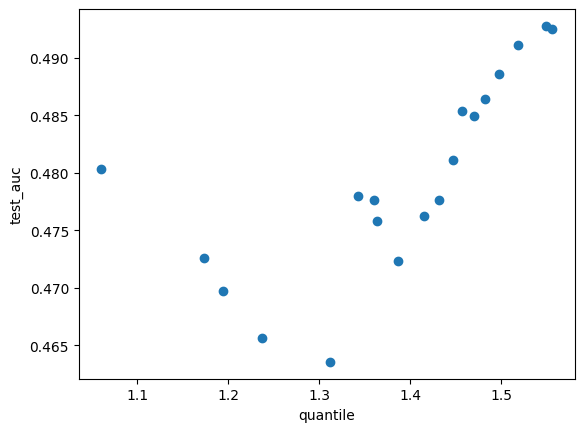

In [26]:
plt.scatter(quantile, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

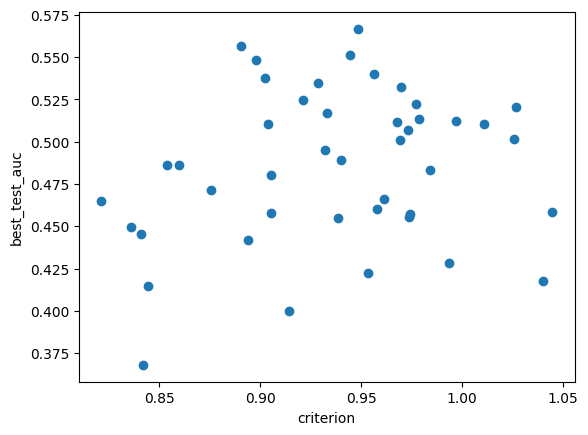

In [27]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

In [28]:
best_quantile = []
best_test_auc = []
for q in quantile_x:
    one_quantile = bdd['criterion'].quantile(q=q)
    best_quantile.append(one_quantile)
    best_test_auc.append(bdd[bdd['criterion'] < one_quantile]['best_test_auc'].mean())

Text(0, 0.5, 'best_test_auc')

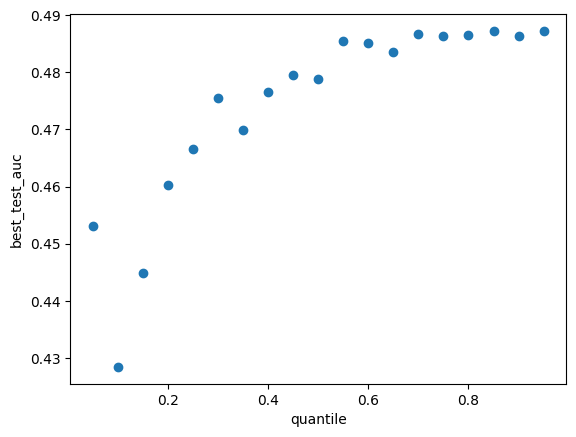

In [29]:
plt.scatter(quantile_x, best_test_auc)
plt.xlabel("quantile")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'val_auc')

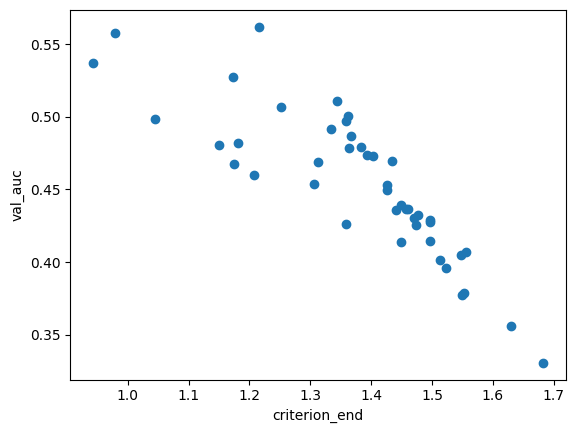

In [30]:
plt.scatter(bdd["criterion_end"], bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

Text(0, 0.5, 'train_auc')

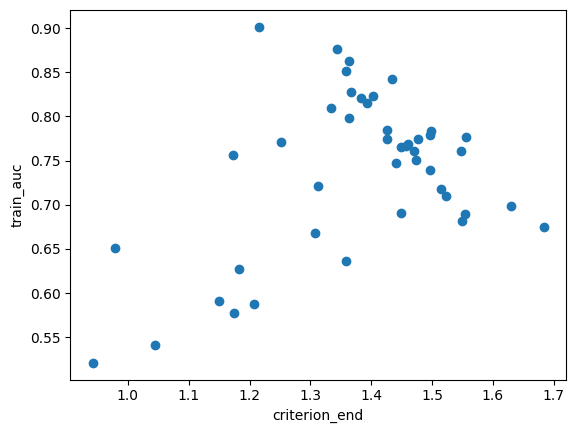

In [75]:
plt.scatter(bdd["criterion_end"], bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")

In [32]:
bdd.sort_values(by=['test_auc'], ascending=False)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
18,/volatile2/jc225751/Runs/61_classifier_regress...,0.809077,0.491685,0.558449,0.497104,0.533099,0.532118,0.160860,0.755010,0.000741,127.992516,0.969797,1.334021,0.364224,-3.324372,-1.116598,-5.114725,-2.939422
36,/volatile2/jc225751/Runs/61_classifier_regress...,0.691126,0.413815,0.558449,0.509042,0.615286,0.471354,0.191329,0.761416,0.000891,136.507050,0.875671,1.449681,0.574009,-2.242020,-1.247190,-4.710496,-3.195220
13,/volatile2/jc225751/Runs/61_classifier_regress...,0.720691,0.469140,0.555845,0.558919,0.506236,0.417824,0.187441,0.751617,0.000540,134.425171,1.040211,1.313272,0.273061,-2.943460,-1.341125,-4.584575,-4.719559
0,/volatile2/jc225751/Runs/61_classifier_regress...,0.717922,0.401343,0.547454,0.461679,0.527183,0.510417,0.180609,0.702613,0.000833,132.817505,1.011139,1.513893,0.502754,-2.725643,-1.119082,-4.481162,-2.426772
12,/volatile2/jc225751/Runs/61_classifier_regress...,0.750293,0.425488,0.547309,0.536125,0.542853,0.524740,0.167250,0.901779,0.000958,129.258194,0.921023,1.473830,0.552808,-5.001514,-1.094205,-6.852085,-4.277654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,/volatile2/jc225751/Runs/61_classifier_regress...,0.591252,0.480652,0.440104,0.548854,0.553246,0.548032,0.192748,0.993446,0.000675,137.951584,0.897901,1.149295,0.251395,-5.427878,-2.115276,-7.346875,-6.771054
32,/volatile2/jc225751/Runs/61_classifier_regress...,0.668272,0.453790,0.435475,0.519928,0.514231,0.522569,0.186683,0.809791,0.000589,137.742218,0.977235,1.306903,0.329667,-5.167782,-1.493960,-6.851033,-3.504163
1,/volatile2/jc225751/Runs/61_classifier_regress...,0.768619,0.436201,0.434028,0.629408,0.534538,0.501881,0.178459,0.821904,0.000530,133.273636,1.025795,1.460017,0.434222,-2.355242,-1.071722,-4.154256,-2.533151
28,/volatile2/jc225751/Runs/61_classifier_regress...,0.828110,0.487048,0.407697,0.474941,0.576431,0.566696,0.179457,0.955285,0.000479,128.769974,0.948628,1.366965,0.418337,-2.287797,-1.046793,-4.378754,-2.589485


Text(0, 0.5, 'best_test_auc')

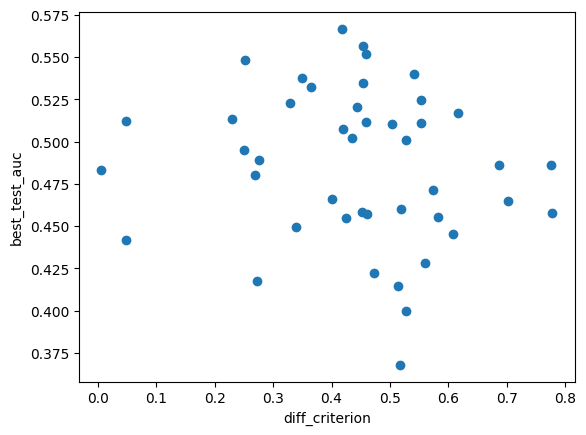

In [33]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

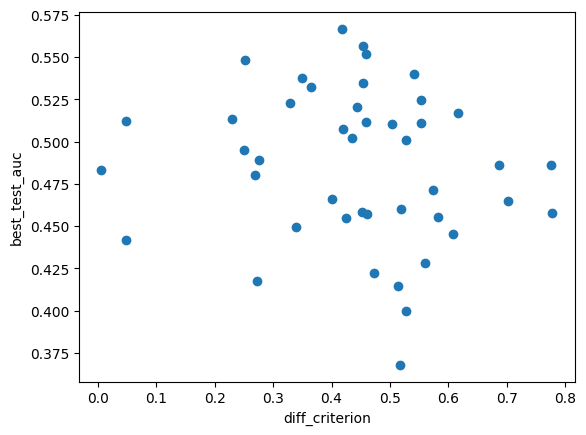

In [34]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

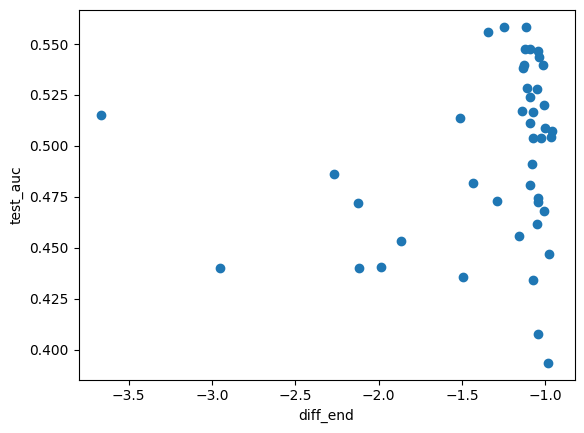

In [35]:
plt.scatter(bdd["diff_end"], bdd.test_auc)
plt.xlabel("diff_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

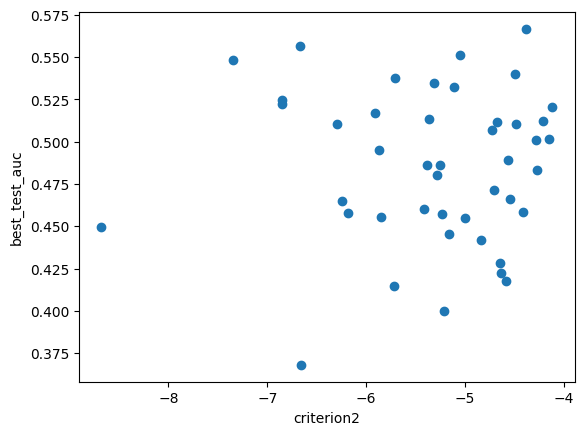

In [36]:
plt.scatter(bdd["criterion2"], bdd.best_test_auc)
plt.xlabel("criterion2")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

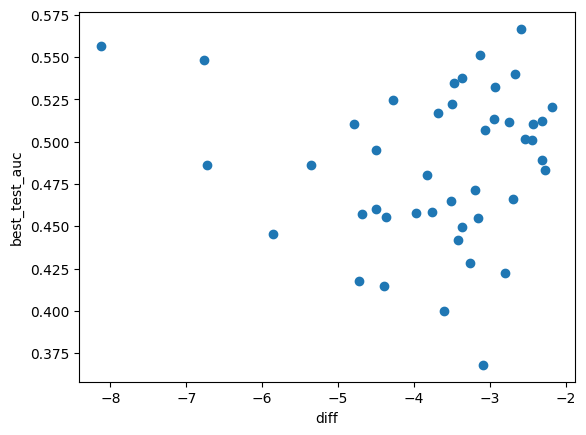

In [37]:
plt.scatter(bdd["diff"], bdd.best_test_auc)
plt.xlabel("diff")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

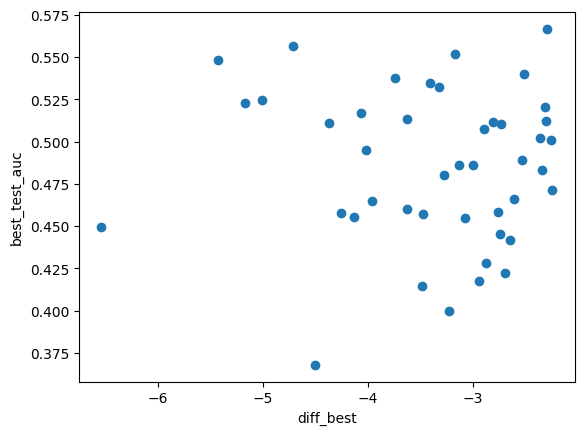

In [38]:
plt.scatter(bdd["diff_best"], bdd.best_test_auc)
plt.xlabel("diff_best")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

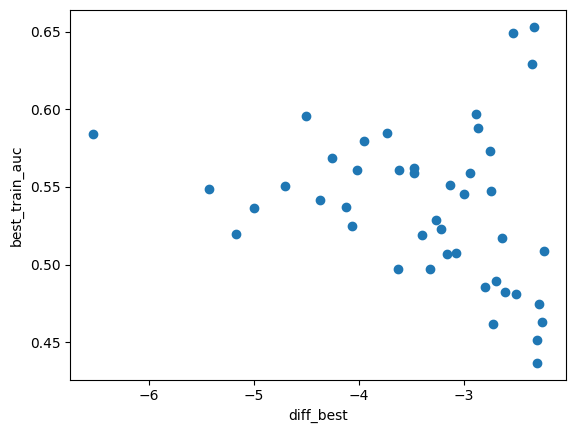

In [39]:
plt.scatter(bdd["diff_best"], bdd.best_train_auc)
plt.xlabel("diff_best")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_test_auc')

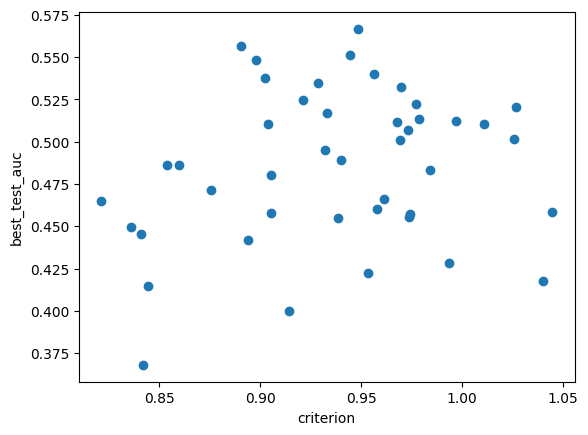

In [76]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_val_auc')

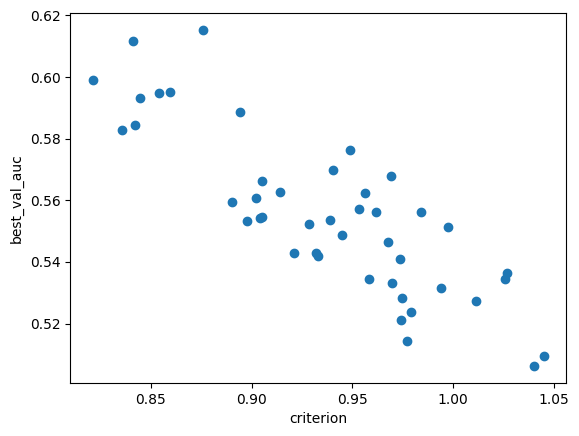

In [77]:
plt.scatter(bdd.criterion, bdd.best_val_auc)
plt.xlabel("criterion")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'best_train_auc')

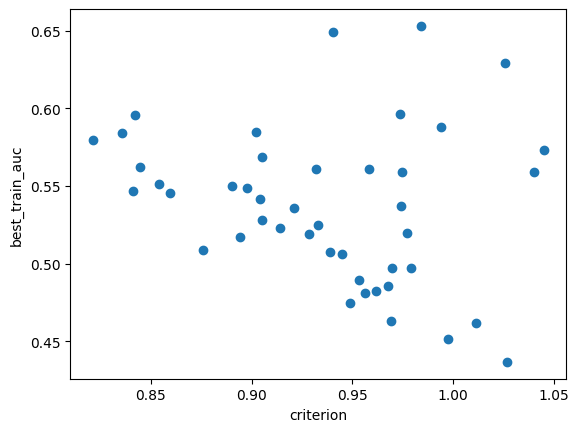

In [78]:
plt.scatter(bdd.criterion, bdd.best_train_auc)
plt.xlabel("criterion")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_test_auc')

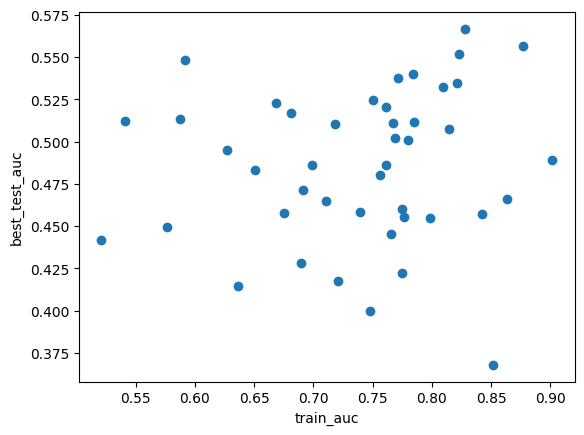

In [79]:
plt.scatter(bdd.train_auc, bdd.best_test_auc)
plt.xlabel("train_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

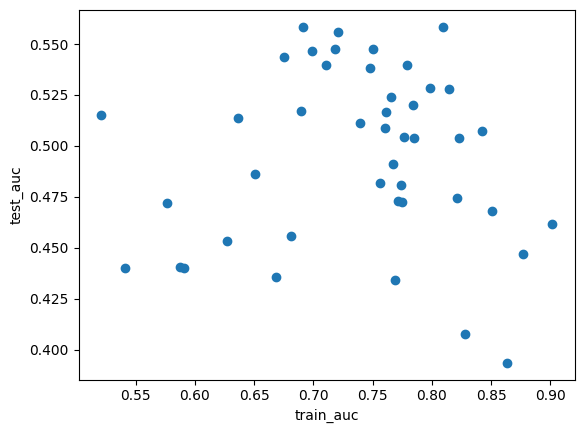

In [44]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

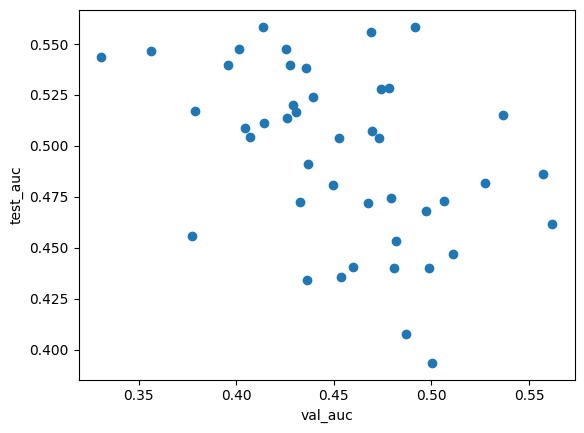

In [45]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

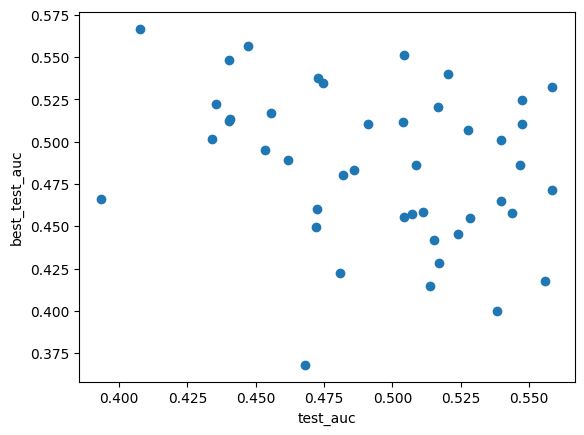

In [46]:
plt.scatter(bdd.test_auc, bdd.best_test_auc)
plt.xlabel("test_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

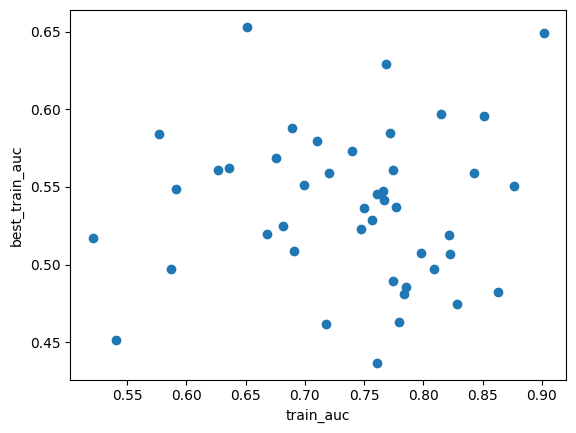

In [47]:
plt.scatter(bdd.train_auc, bdd.best_train_auc)
plt.xlabel("train_auc")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_val_auc')

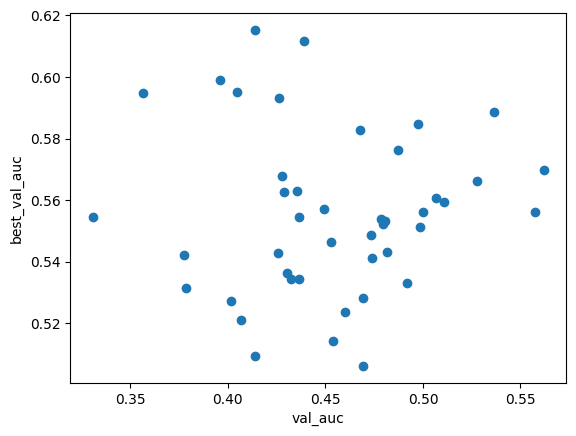

In [48]:
plt.scatter(bdd.val_auc, bdd.best_val_auc)
plt.xlabel("val_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'test_auc')

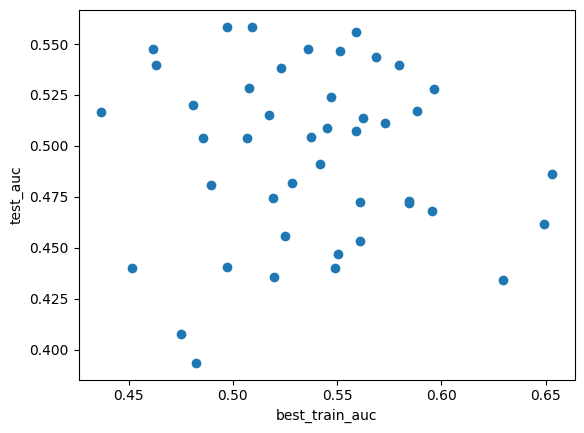

In [49]:
plt.scatter(bdd.best_train_auc, bdd.test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_val_auc')

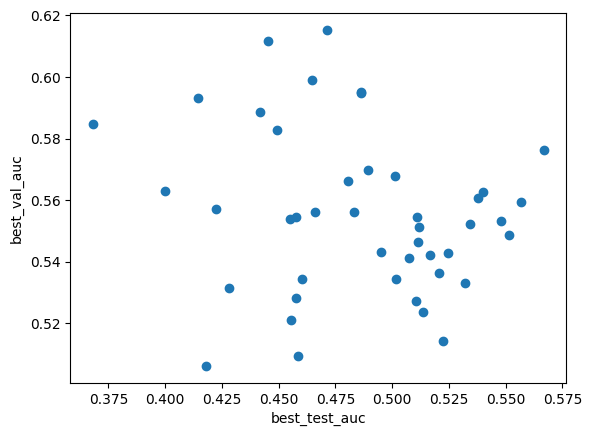

In [50]:
plt.scatter(bdd.best_test_auc, bdd.best_val_auc)
plt.xlabel("best_test_auc")
plt.ylabel("best_val_auc")

(0.4, 0.65)

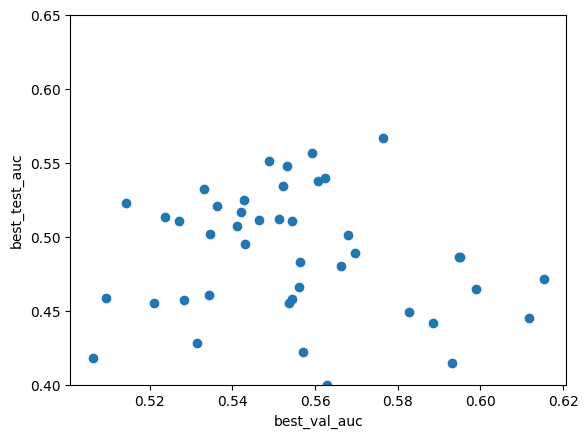

In [51]:
plt.scatter(bdd.best_val_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

(0.4, 0.65)

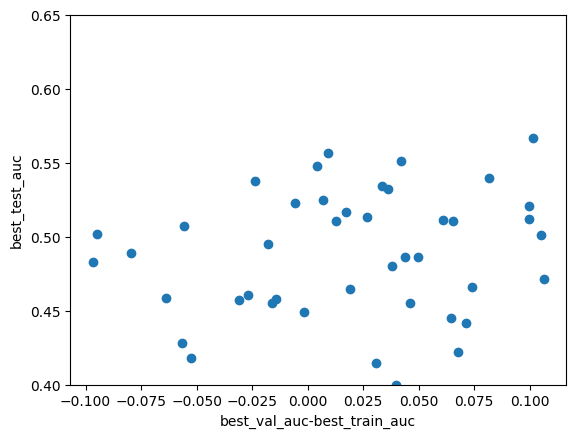

In [52]:
plt.scatter(bdd.best_val_auc-bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc-best_train_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

Text(0, 0.5, 'best_test_auc')

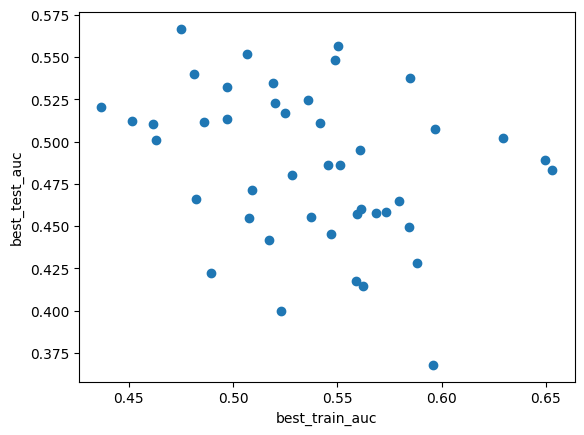

In [53]:
plt.scatter(bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_val_auc')

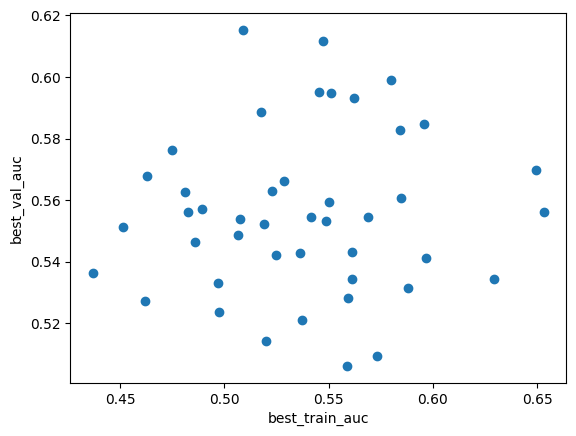

In [54]:
plt.scatter(bdd.best_train_auc, bdd.best_val_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'criterion')

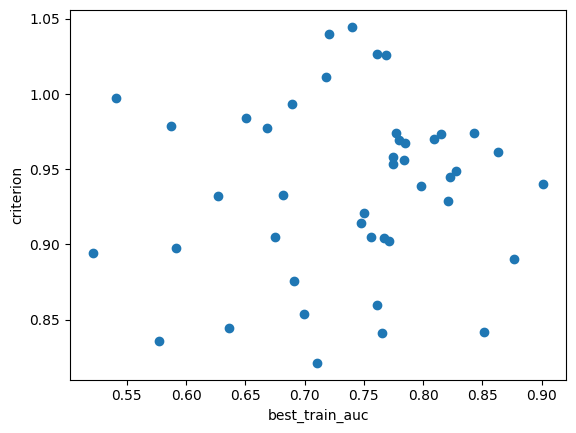

In [55]:
plt.scatter(bdd.train_auc, bdd.criterion)
plt.xlabel("best_train_auc")
plt.ylabel("criterion")

(0.7, 0.8)

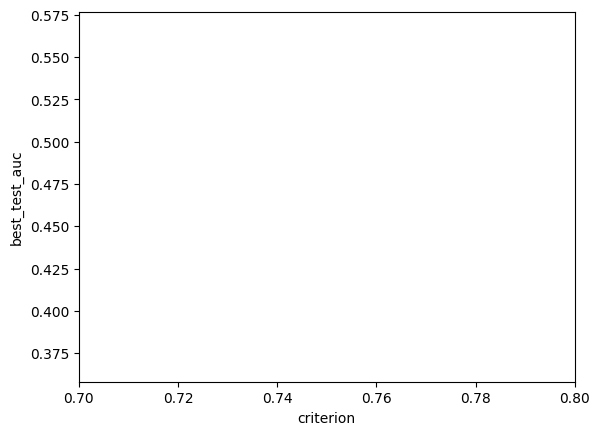

In [56]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")
plt.xlim((0.7,0.8))

(0.75, 0.9)

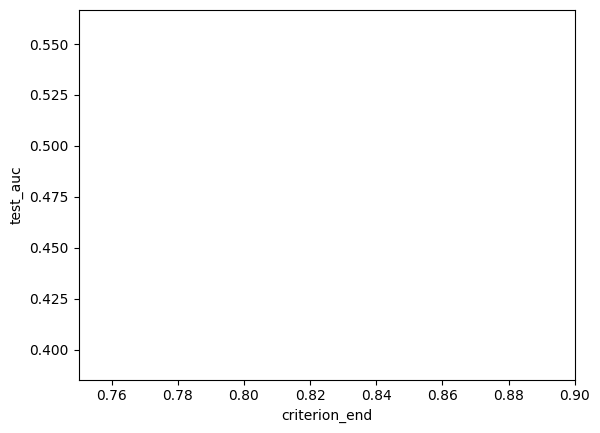

In [57]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
plt.xlim((0.75,0.9))

Text(0, 0.5, 'best_test_auc')

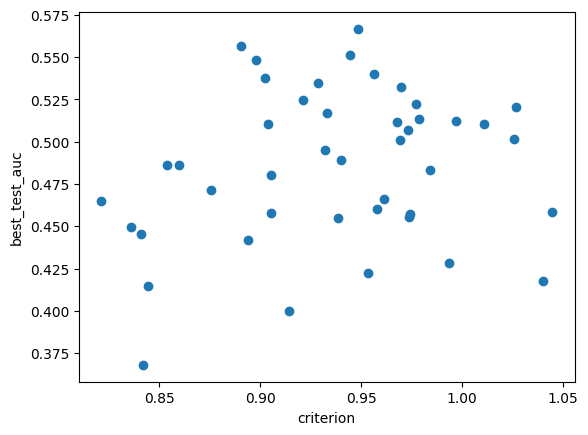

In [58]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

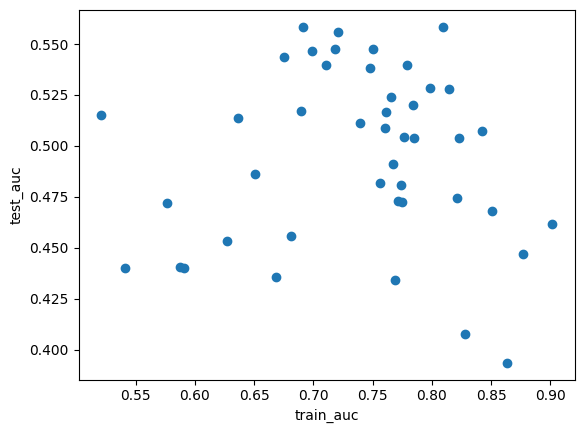

In [59]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

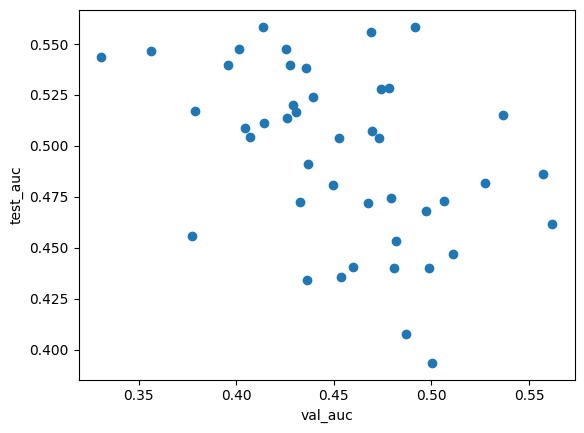

In [60]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

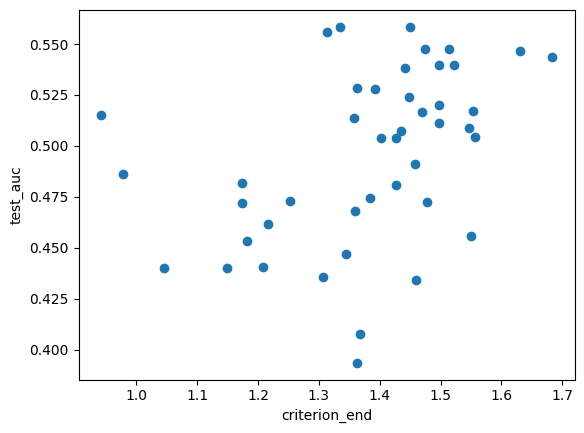

In [61]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

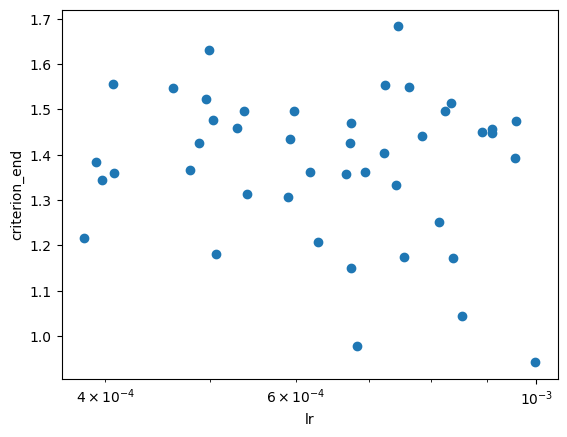

In [62]:
plt.scatter(bdd.lr, bdd.criterion_end)
plt.xlabel("lr")
plt.ylabel("criterion_end")
plt.xscale("log")

Text(0, 0.5, 'criterion_end')

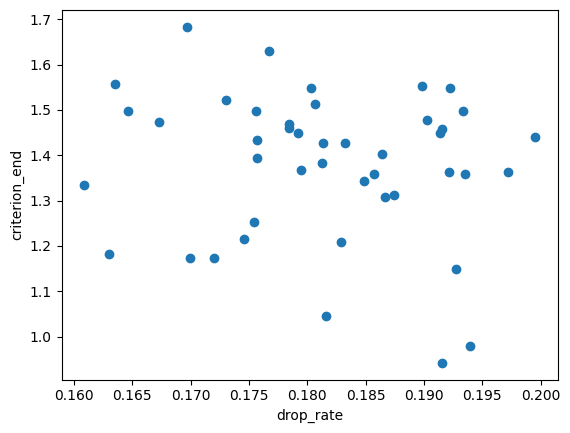

In [63]:
plt.scatter(bdd.drop_rate, bdd.criterion_end)
plt.xlabel("drop_rate")
plt.ylabel("criterion_end")

/tmp/ipykernel_181003/1393031548.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


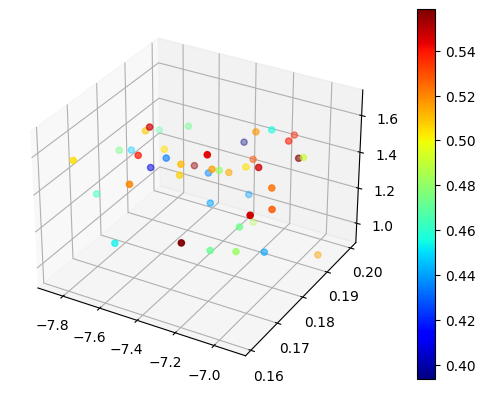

In [64]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
z = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
scat = ax.scatter(np.log(bdd.lr), bdd.drop_rate, z, c=scalarMap.to_rgba(cs))
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_181003/3606356904.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


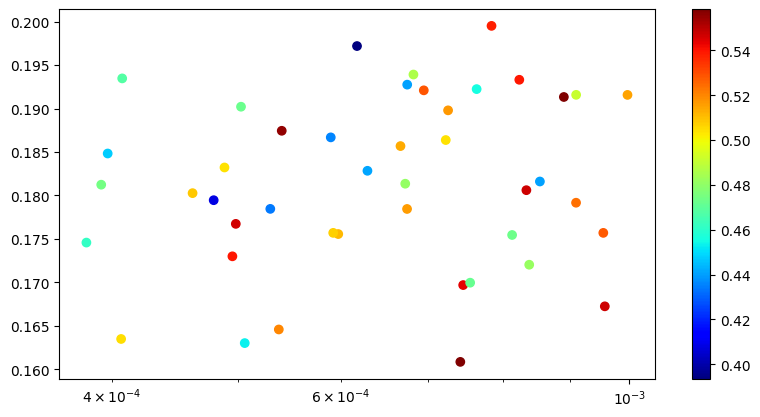

In [65]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_181003/295477420.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


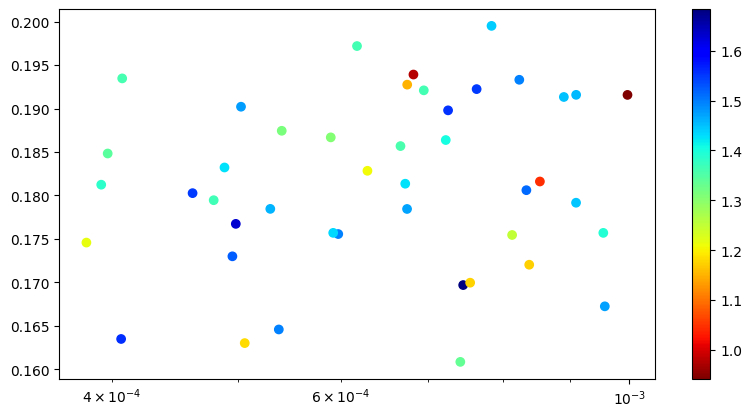

In [66]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet_r'
cm = plt.get_cmap(colorsMap)
cs = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

Text(0, 0.5, 'criterion_end')

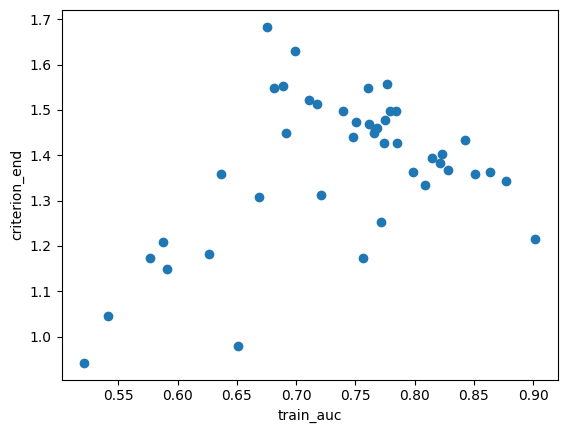

In [67]:
plt.scatter(bdd.train_auc, bdd.criterion_end)
plt.xlabel("train_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'val_auc')

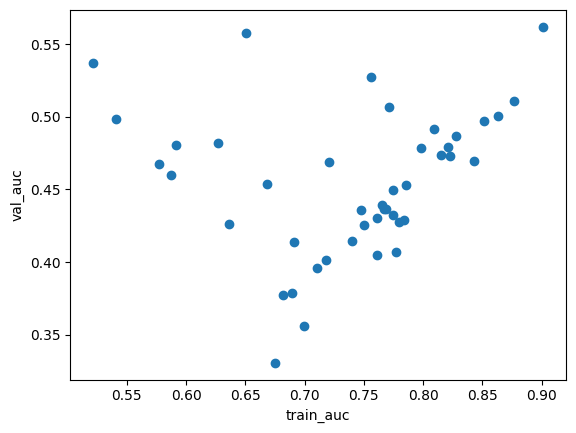

In [68]:
plt.scatter(bdd.train_auc, bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

Text(0, 0.5, 'test_auc')

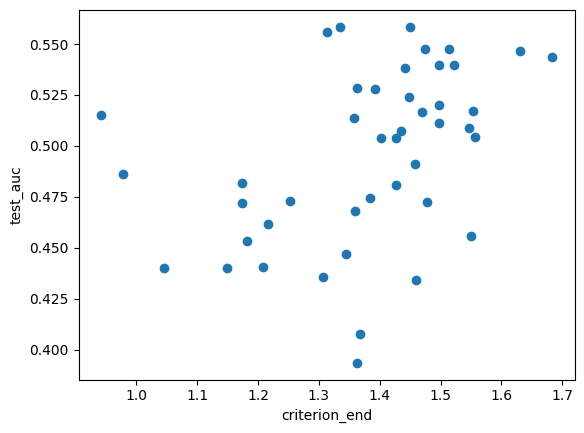

In [69]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'val_auc')

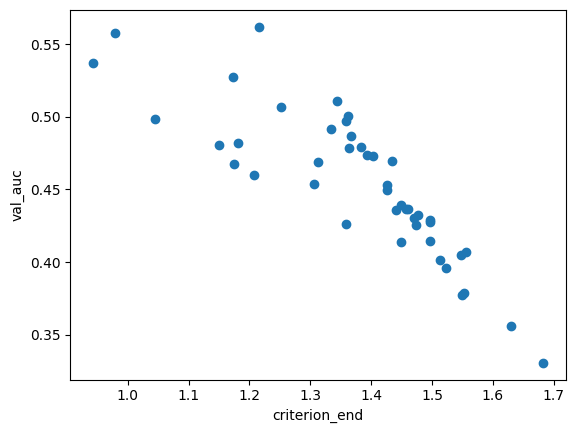

In [70]:
plt.scatter(bdd.criterion_end, bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

Text(0, 0.5, 'train_auc')

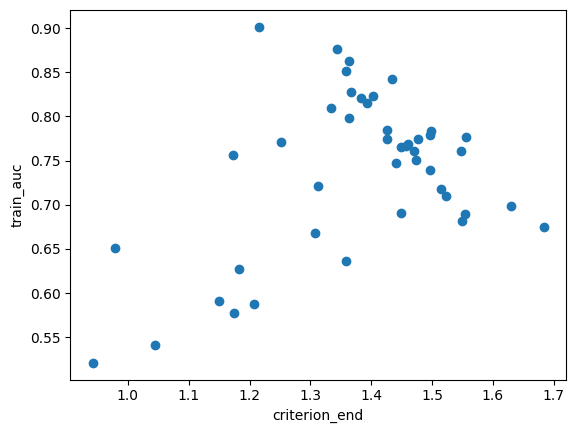

In [71]:
plt.scatter(bdd.criterion_end, bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")

In [72]:
bdd.sort_values(by=['criterion_end'], ascending=True)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
19,/volatile2/jc225751/Runs/61_classifier_regress...,0.521019,0.536617,0.515046,0.517378,0.588583,0.441840,0.191568,0.839467,0.000997,138.406586,0.894039,0.942365,0.048326,-2.642186,-3.665254,-4.836664,-3.422763
42,/volatile2/jc225751/Runs/61_classifier_regress...,0.650818,0.557403,0.485966,0.653075,0.556284,0.483073,0.193911,0.975979,0.000682,138.493896,0.984223,0.978609,0.005615,-2.335197,-2.269003,-4.275113,-2.272295
27,/volatile2/jc225751/Runs/61_classifier_regress...,0.540917,0.498721,0.440104,0.451477,0.551327,0.512008,0.181608,0.905429,0.000854,138.412292,0.997195,1.044754,0.047559,-2.304090,-2.952748,-4.210097,-2.317470
17,/volatile2/jc225751/Runs/61_classifier_regress...,0.591252,0.480652,0.440104,0.548854,0.553246,0.548032,0.192748,0.993446,0.000675,137.951584,0.897901,1.149295,0.251395,-5.427878,-2.115276,-7.346875,-6.771054
9,/volatile2/jc225751/Runs/61_classifier_regress...,0.756379,0.527662,0.481771,0.528399,0.566358,0.480324,0.172035,0.951888,0.000838,130.074173,0.905244,1.173393,0.268149,-3.271257,-1.432476,-5.283844,-3.835008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,/volatile2/jc225751/Runs/61_classifier_regress...,0.681429,0.377358,0.455729,0.524856,0.542053,0.516782,0.192236,0.942874,0.000763,134.163895,0.933091,1.549354,0.616262,-4.062990,-1.158138,-5.908486,-3.683119
31,/volatile2/jc225751/Runs/61_classifier_regress...,0.689305,0.378638,0.517072,0.588243,0.531500,0.428241,0.189792,0.975690,0.000725,133.610199,0.993744,1.553392,0.559649,-2.869216,-1.137350,-4.650034,-3.263788
6,/volatile2/jc225751/Runs/61_classifier_regress...,0.776706,0.406780,0.504340,0.537268,0.521106,0.455440,0.163495,0.899164,0.000407,133.307648,0.973949,1.556367,0.582418,-4.125105,-0.967777,-5.846069,-4.363660
4,/volatile2/jc225751/Runs/61_classifier_regress...,0.699085,0.356252,0.546586,0.551193,0.594819,0.486111,0.176734,0.833540,0.000498,136.239258,0.853988,1.630329,0.776342,-3.132098,-1.041760,-5.384173,-6.731178


Text(0, 0.5, 'criterion_end')

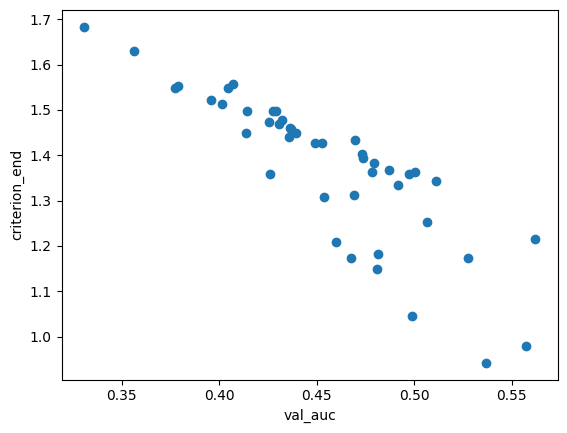

In [73]:
plt.scatter(bdd.val_auc, bdd.criterion_end)
plt.xlabel("val_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'test_auc')

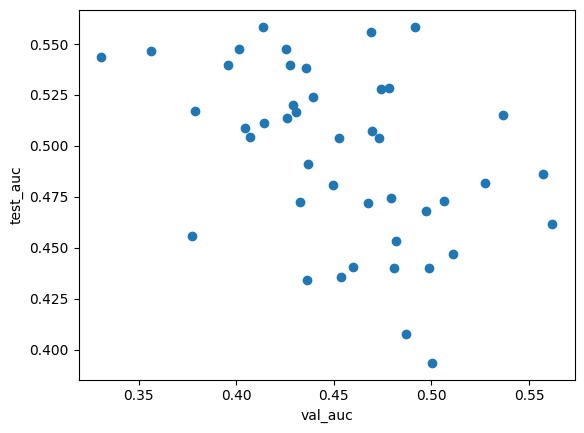

In [74]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")